In [2]:
import pandas as pd
import numpy as np
import openpyxl

In [3]:
df = pd.read_excel("D:\Copper modling\Copper_Set.xlsx")



In [4]:

for i in df.columns:
  print(f"{i}:{df[i].nunique()}")

id:181671
item_date:252
quantity tons:181673
customer:1169
country:17
status:9
item type:7
application:30
thickness:594
width:1386
material_ref:16563
product_ref:33
delivery date:28
selling_price:9795


In [515]:
df.head()

,id,item_date,quantity tons,customer,country,status,item type,application,thickness,width,material_ref,product_ref,delivery date,selling_price
0,EC06F063-9DF0-440C-8764-0B0C05A4F6AE,20210401.0,54.151139,30156308.0,28.0,Won,W,10.0,2.00,1500.0,DEQ1 S460MC,1670798778,20210701.0,854.00
1,4E5F4B3D-DDDF-499D-AFDE-A3227EC49425,20210401.0,768.024839,30202938.0,25.0,Won,W,41.0,0.80,1210.0,0000000000000000000000000000000000104991,1668701718,20210401.0,1047.00
2,E140FF1B-2407-4C02-A0DD-780A093B1158,20210401.0,386.127949,30153963.0,30.0,Won,WI,28.0,0.38,952.0,S0380700,628377,20210101.0,644.33
3,F8D507A0-9C62-4EFE-831E-33E1DA53BB50,20210401.0,202.411065,30349574.0,32.0,Won,S,59.0,2.30,1317.0,DX51D+ZM310MAO 2.3X1317,1668701718,20210101.0,768.00
4,4E1C4E78-152B-430A-8094-ADD889C9D0AD,20210401.0,785.526262,30211560.0,28.0,Won,W,10.0,4.00,2000.0,2_S275JR+AR-CL1,640665,20210301.0,577.00


In [516]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181673 entries, 0 to 181672
Data columns (total 14 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   id             181671 non-null  object 
 1   item_date      181672 non-null  float64
 2   quantity tons  181673 non-null  object 
 3   customer       181672 non-null  float64
 4   country        181645 non-null  float64
 5   status         181671 non-null  object 
 6   item type      181673 non-null  object 
 7   application    181649 non-null  float64
 8   thickness      181672 non-null  float64
 9   width          181673 non-null  float64
 10  material_ref   103754 non-null  object 
 11  product_ref    181673 non-null  int64  
 12  delivery date  181672 non-null  float64
 13  selling_price  181672 non-null  float64
dtypes: float64(8), int64(1), object(5)
memory usage: 19.4+ MB


In [517]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
item_date,181672.0,2.020459e+07,4.551119e+03,19950000.00,20200929.0,20201130.0,2.021020e+07,2.021040e+07
customer,181672.0,3.051221e+07,2.433382e+07,12458.00,30196884.0,30205242.0,3.028042e+07,2.147484e+09
country,181645.0,4.489302e+01,2.440421e+01,25.00,26.0,30.0,7.800000e+01,1.130000e+02
application,181649.0,2.561581e+01,1.775417e+01,2.00,10.0,15.0,4.100000e+01,9.900000e+01
thickness,181672.0,2.564827e+00,6.572321e+00,0.18,0.7,1.5,3.000000e+00,2.500000e+03
width,181673.0,1.295287e+03,2.616318e+02,1.00,1180.0,1250.0,1.500000e+03,2.990000e+03
product_ref,181673.0,4.739679e+08,7.175101e+08,611728.00,611993.0,640665.0,1.332077e+09,1.722208e+09
delivery date,181672.0,2.020738e+07,2.411059e+04,20190401.00,20201101.0,20210101.0,2.021040e+07,3.031010e+07
selling_price,181672.0,1.918036e+03,3.317956e+05,-1160.00,669.0,812.0,9.530000e+02,1.000010e+08


In [518]:
df


,id,item_date,quantity tons,customer,country,status,item type,application,thickness,width,material_ref,product_ref,delivery date,selling_price
0,EC06F063-9DF0-440C-8764-0B0C05A4F6AE,20210401.0,54.151139,30156308.0,28.0,Won,W,10.0,2.00,1500.0,DEQ1 S460MC,1670798778,20210701.0,854.00
1,4E5F4B3D-DDDF-499D-AFDE-A3227EC49425,20210401.0,768.024839,30202938.0,25.0,Won,W,41.0,0.80,1210.0,0000000000000000000000000000000000104991,1668701718,20210401.0,1047.00
2,E140FF1B-2407-4C02-A0DD-780A093B1158,20210401.0,386.127949,30153963.0,30.0,Won,WI,28.0,0.38,952.0,S0380700,628377,20210101.0,644.33
3,F8D507A0-9C62-4EFE-831E-33E1DA53BB50,20210401.0,202.411065,30349574.0,32.0,Won,S,59.0,2.30,1317.0,DX51D+ZM310MAO 2.3X1317,1668701718,20210101.0,768.00
4,4E1C4E78-152B-430A-8094-ADD889C9D0AD,20210401.0,785.526262,30211560.0,28.0,Won,W,10.0,4.00,2000.0,2_S275JR+AR-CL1,640665,20210301.0,577.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
181668,DE633116-D1DF-4846-982E-55EFC3658A76,20200702.0,102.482422,30200854.0,25.0,Won,W,41.0,0.96,1220.0,0000000000000000000000000000000001000777,164141591,20200701.0,591.00
181669,A48374B1-E6DB-45F2-889A-1F9C27C099EB,20200702.0,208.086469,30200854.0,25.0,Won,W,41.0,0.95,1500.0,0000000000000000000000000000000001000227,164141591,20200701.0,589.00
181670,91643238-5C7B-4237-9A5F-63AE3D35F320,20200702.0,4.235594,30200854.0,25.0,Won,W,41.0,0.71,1250.0,0000000000000000000000000000000001004216,164141591,20200701.0,619.00
181671,7AFFD323-01D9-4E15-B80D-7D1B03498FC8,20200702.0,-2000,30200854.0,25.0,Won,W,41.0,0.85,1250.0,0000000000000000000000000000000001001149,164141591,20200701.0,601.00


In [5]:
df.drop_duplicates().shape


(181673, 14)

In [6]:
df.isna().sum()

id                   2
item_date            1
quantity tons        0
customer             1
country             28
status               2
item type            0
application         24
thickness            1
width                0
material_ref     77919
product_ref          0
delivery date        1
selling_price        1
dtype: int64

In [7]:
df['material_ref'] = df['material_ref'].replace(r'^00000.*$', None, regex=True)


In [8]:
df.dtypes

id                object
item_date        float64
quantity tons     object
customer         float64
country          float64
status            object
item type         object
application      float64
thickness        float64
width            float64
material_ref      object
product_ref        int64
delivery date    float64
selling_price    float64
dtype: object

In [9]:
# Impute numeric columns with mean or median
df['selling_price'] = df['selling_price'].fillna(df['selling_price'].mean())
df['thickness'] = df['thickness'].fillna(df['thickness'].median())

# Impute categorical columns with mode
df['status'] = df['status'].fillna(df['status'].mode()[0])
df['country'] = df['country'].fillna(df['country'].mode()[0])
df['application'] = df['application'].fillna(df['application'].mode()[0])

# Drop 'material_ref' column if it has too many missing values
df = df.drop(columns=['material_ref'])




In [10]:
df.isna().sum()

id               2
item_date        1
quantity tons    0
customer         1
country          0
status           0
item type        0
application      0
thickness        0
width            0
product_ref      0
delivery date    1
selling_price    0
dtype: int64

In [525]:
#df.dropna(subset=['item_date', 'delivery date'], inplace=True)



In [526]:
df.dtypes

id                object
item_date        float64
quantity tons     object
customer         float64
country          float64
status            object
item type         object
application      float64
thickness        float64
width            float64
product_ref        int64
delivery date    float64
selling_price    float64
dtype: object

In [11]:
df["quantity tons"] = pd.to_numeric(df["quantity tons"], errors='coerce') 



In [12]:
# Convert `item_date` to a datetime type and extract the year and month
df['item_date'] = pd.to_datetime(df['item_date'], format='%Y%m%d', errors='coerce')
df['delivery date'] = pd.to_datetime(df['delivery date'], format='%Y%m%d', errors='coerce')



In [13]:

df['lead_time'] = (df['delivery date'] - df['item_date']).dt.days


In [14]:
# Assume 'lead_time' is the column with lead time values
df['lead_time'] = df['delivery date'] - df['item_date']

# If negative lead times are errors, set them to NaN
#df.loc[df['lead_time'] < pd.Timedelta(0), 'lead_time'] = pd.NaT

# Alternatively, if you want to set negative lead times to zero
df.loc[df['lead_time'] < pd.Timedelta(0), 'lead_time'] = pd.Timedelta(0)

# Or remove rows with negative lead times
# df = df[df['lead_time'] >= pd.Timedelta(0)]


In [15]:
df.isnull().sum()

id               2
item_date        3
quantity tons    1
customer         1
country          0
status           0
item type        0
application      0
thickness        0
width            0
product_ref      0
delivery date    3
selling_price    0
lead_time        6
dtype: int64

In [16]:
df.shape

(181673, 14)

In [19]:
df.dropna(subset=['item_date', 'delivery date', 'quantity tons', 'lead_time','customer'], inplace=True)



In [ ]:
df['lead_time'] = df['lead_time'].dt.days


In [21]:
# Count rows where lead_time is 0
zero_lead_time_count = (df['lead_time'] == 0).sum()
zero_lead_time_count


np.int64(16567)

In [22]:
df

,id,item_date,quantity tons,customer,country,status,item type,application,thickness,width,product_ref,delivery date,selling_price,lead_time
0,EC06F063-9DF0-440C-8764-0B0C05A4F6AE,2021-04-01,54.151139,30156308.0,28.0,Won,W,10.0,2.00,1500.0,1670798778,2021-07-01,854.00,91
1,4E5F4B3D-DDDF-499D-AFDE-A3227EC49425,2021-04-01,768.024839,30202938.0,25.0,Won,W,41.0,0.80,1210.0,1668701718,2021-04-01,1047.00,0
2,E140FF1B-2407-4C02-A0DD-780A093B1158,2021-04-01,386.127949,30153963.0,30.0,Won,WI,28.0,0.38,952.0,628377,2021-01-01,644.33,0
3,F8D507A0-9C62-4EFE-831E-33E1DA53BB50,2021-04-01,202.411065,30349574.0,32.0,Won,S,59.0,2.30,1317.0,1668701718,2021-01-01,768.00,0
4,4E1C4E78-152B-430A-8094-ADD889C9D0AD,2021-04-01,785.526262,30211560.0,28.0,Won,W,10.0,4.00,2000.0,640665,2021-03-01,577.00,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
181668,DE633116-D1DF-4846-982E-55EFC3658A76,2020-07-02,102.482422,30200854.0,25.0,Won,W,41.0,0.96,1220.0,164141591,2020-07-01,591.00,0
181669,A48374B1-E6DB-45F2-889A-1F9C27C099EB,2020-07-02,208.086469,30200854.0,25.0,Won,W,41.0,0.95,1500.0,164141591,2020-07-01,589.00,0
181670,91643238-5C7B-4237-9A5F-63AE3D35F320,2020-07-02,4.235594,30200854.0,25.0,Won,W,41.0,0.71,1250.0,164141591,2020-07-01,619.00,0
181671,7AFFD323-01D9-4E15-B80D-7D1B03498FC8,2020-07-02,-2000.000000,30200854.0,25.0,Won,W,41.0,0.85,1250.0,164141591,2020-07-01,601.00,0


## outliers

In [23]:
df.describe()

,item_date,quantity tons,customer,country,application,thickness,width,product_ref,delivery date,selling_price,lead_time
count,181665,1.816650e+05,1.816650e+05,181665.000000,181665.000000,181665.000000,181665.000000,1.816650e+05,181665,1.816650e+05,181665.000000
mean,2020-11-26 22:57:24.656923904,5.875149e+03,3.051222e+07,44.897999,25.613789,2.564873,1295.287072,4.739686e+08,2021-01-25 22:44:57.012633088,1.918082e+03,62.061393
min,2020-07-02 00:00:00,-2.000000e+03,1.245800e+04,25.000000,2.000000,0.180000,1.000000,6.117280e+05,2019-04-01 00:00:00,-1.160000e+03,0.000000
25%,2020-09-29 00:00:00,1.096990e+01,3.019688e+07,26.000000,10.000000,0.700000,1180.000000,6.119930e+05,2020-11-01 00:00:00,6.690000e+02,28.000000
50%,2020-11-30 00:00:00,3.036411e+01,3.020524e+07,30.000000,15.000000,1.500000,1250.000000,6.406650e+05,2021-01-01 00:00:00,8.120000e+02,59.000000
75%,2021-02-03 00:00:00,6.715909e+01,3.028042e+07,78.000000,41.000000,3.000000,1500.000000,1.332077e+09,2021-04-01 00:00:00,9.530000e+02,97.000000
max,2021-04-01 00:00:00,1.000000e+09,2.147484e+09,113.000000,99.000000,2500.000000,2990.000000,1.722208e+09,2022-01-01 00:00:00,1.000010e+08,448.000000
std,NaN,2.349126e+06,2.433428e+07,24.405804,17.753693,6.572439,261.635926,7.175107e+08,NaN,3.318020e+05,42.203594


In [24]:
del df["item_date"]
del df["id"]
#del df["customer"]
del df["delivery date"]
#del df["product_ref"]

In [25]:
df['quantity tons'] = df['quantity tons'].apply(lambda x: np.nan if x<=0 else x)

In [26]:
df['quantity tons'].unique()

array([ 54.15113862, 768.0248392 , 386.12794891, ..., 208.08646861,
         4.23559357, 406.68653838])

In [27]:
df.isna().sum()

quantity tons    4
customer         0
country          0
status           0
item type        0
application      0
thickness        0
width            0
product_ref      0
selling_price    0
lead_time        0
dtype: int64

In [28]:
df['quantity tons'].fillna(df['quantity tons'].median(), inplace=True)

C:\Users\SUBBULASKSHMI S\AppData\Local\Temp\ipykernel_4148\1785227444.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['quantity tons'].fillna(df['quantity tons'].median(), inplace=True)


In [29]:
# Using IQR and clip() methods to handle the outliers and add a new column of dataframe

def outlier(df, column):
    iqr = df[column].quantile(0.75) - df[column].quantile(0.25)
    upper_threshold = df[column].quantile(0.75) + (1.5*iqr)
    lower_threshold = df[column].quantile(0.25) - (1.5*iqr)
    df[column] = df[column].clip(lower_threshold, upper_threshold)
    

In [30]:
outlier(df, "quantity tons")
outlier(df, "selling_price")
outlier(df, "thickness")
outlier(df, "width")


In [31]:
import seaborn as sns
import matplotlib.pyplot as plt

def box(df, column):
    sns.boxplot(y=df)
import seaborn as sns
import matplotlib.pyplot as plt

def box(df, column):
    # Create a boxplot for the specified column
    sns.boxplot(y=df[column])

    # Set the title for the plot
    plt.title(f'Boxplot for {column}')

    # Show the plot
    plt.show()

    # Show the plot
    plt.show()


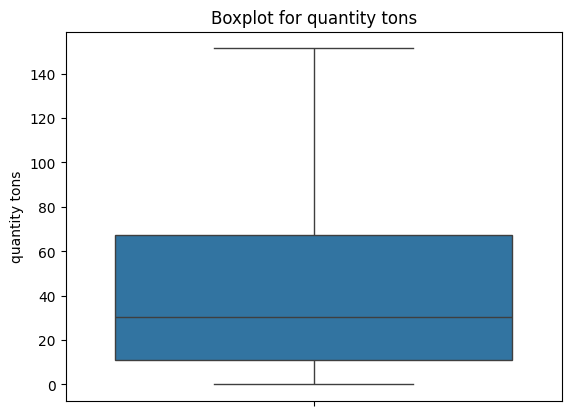

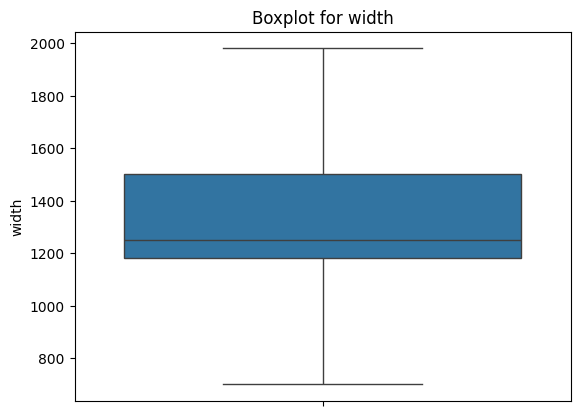

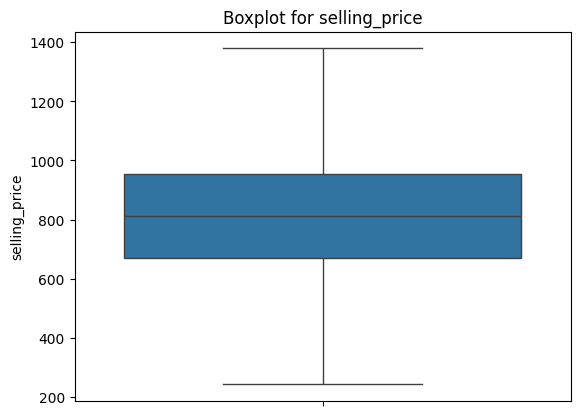

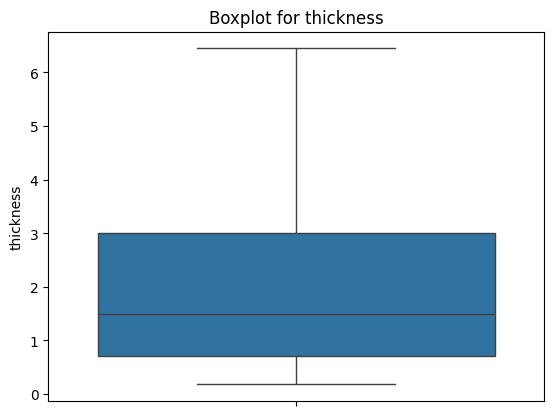

In [32]:
box(df, "quantity tons")
box(df, 'width')  # For example, to plot the boxplot of 'quantity tons'
box(df, 'selling_price')
box(df, "thickness")

In [33]:
df['status'].unique()

array(['Won', 'Draft', 'To be approved', 'Lost', 'Not lost for AM',
       'Wonderful', 'Revised', 'Offered', 'Offerable'], dtype=object)

In [34]:
df['status'] = df['status'].map({'Lost':0, 'Won':1, 'Draft':2, 'To be approved':3, 'Not lost for AM':4,
                                 'Wonderful':5, 'Revised':6, 'Offered':7, 'Offerable':8})


In [35]:
df['item type'].unique()


array(['W', 'WI', 'S', 'Others', 'PL', 'IPL', 'SLAWR'], dtype=object)

In [60]:
df['item type'].unique()

array([5., 6., 3., 1., 2., 0., 4.])

In [36]:
from sklearn.preprocessing import OrdinalEncoder

# Make sure 'item type' column is categorical
df['item type'] = OrdinalEncoder().fit_transform(df[['item type']])




In [37]:
df1=df.copy()
 # Replace 'row_index' with your desired column name
df1



,quantity tons,customer,country,status,item type,application,thickness,width,product_ref,selling_price,lead_time
0,54.151139,30156308.0,28.0,1,5.0,10.0,2.00,1500.0,1670798778,854.00,91
1,151.441652,30202938.0,25.0,1,5.0,41.0,0.80,1210.0,1668701718,1047.00,0
2,151.441652,30153963.0,30.0,1,6.0,28.0,0.38,952.0,628377,644.33,0
3,151.441652,30349574.0,32.0,1,3.0,59.0,2.30,1317.0,1668701718,768.00,0
4,151.441652,30211560.0,28.0,1,5.0,10.0,4.00,1980.0,640665,577.00,0
...,...,...,...,...,...,...,...,...,...,...,...
181668,102.482422,30200854.0,25.0,1,5.0,41.0,0.96,1220.0,164141591,591.00,0
181669,151.441652,30200854.0,25.0,1,5.0,41.0,0.95,1500.0,164141591,589.00,0
181670,4.235594,30200854.0,25.0,1,5.0,41.0,0.71,1250.0,164141591,619.00,0
181671,30.364989,30200854.0,25.0,1,5.0,41.0,0.85,1250.0,164141591,601.00,0


In [553]:
#Regression model for predict the leadtime

In [38]:
df2 = df1[df1['lead_time'] != 0]



In [39]:
df3 = df1[df1['lead_time'] == 0]



In [40]:
df4=df3.copy()



In [41]:
del df4['lead_time']

<Axes: >

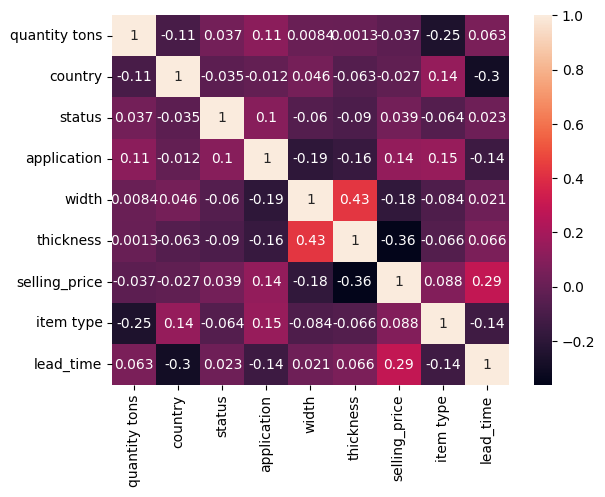

In [42]:
col = ['quantity tons','country','status','application','width','thickness','selling_price','item type','lead_time']
df_heatmap = df2[col].corr()
sns.heatmap(df_heatmap, annot=True)

In [43]:
from sklearn.model_selection import train_test_split

X = df2.drop(columns=['lead_time'])
y = df2.loc[:, 'lead_time']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 145)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((123823, 10), (41275, 10), (123823,), (41275,))

In [44]:
from sklearn.tree import DecisionTreeRegressor

model = DecisionTreeRegressor()

model.fit(X_train, y_train)

model.score(X_test, y_test)

0.7142485429677362

In [ ]:
from sklearn.model_selection import cross_val_score

for depth in range(1,30):
  model = DecisionTreeRegressor(max_depth = depth)
  model.fit(X_train, y_train)
  train_score = model.score(X_train, y_train)
  cross_val = np.mean(cross_val_score(model, X_train, y_train, cv = 10))
  print(f"Depth - {depth}, TrainScore: {train_score}, Cross-ValScore: {cross_val}")

In [46]:
model = DecisionTreeRegressor(random_state=42, max_depth=18)
model.fit(X_train, y_train)
train_score = model.score(X_train, y_train)
train_score 

0.9108045583152442

In [47]:
model.predict(df4)

array([ 8.94444444, 41.        , 75.85416667, ...,  2.        ,
        6.05128205,  6.05128205])

In [48]:
# Generate predictions
predictions = model.predict(df4)

# Convert predictions to a DataFrame
df_predictions = df4.copy()  # Copy the input DataFrame
df_predictions['lead_time'] = predictions  # Add predictions as a new column

# Display the resulting DataFrame
df_predictions


,quantity tons,customer,country,status,item type,application,thickness,width,product_ref,selling_price,lead_time
1,151.441652,30202938.0,25.0,1,5.0,41.0,0.80,1210.0,1668701718,1047.00,8.944444
2,151.441652,30153963.0,30.0,1,6.0,28.0,0.38,952.0,628377,644.33,41.000000
3,151.441652,30349574.0,32.0,1,3.0,59.0,2.30,1317.0,1668701718,768.00,75.854167
4,151.441652,30211560.0,28.0,1,5.0,10.0,4.00,1980.0,640665,577.00,48.000000
5,151.441652,30202938.0,25.0,1,5.0,41.0,1.50,1265.0,1668701718,983.00,8.944444
...,...,...,...,...,...,...,...,...,...,...,...
181668,102.482422,30200854.0,25.0,1,5.0,41.0,0.96,1220.0,164141591,591.00,6.051282
181669,151.441652,30200854.0,25.0,1,5.0,41.0,0.95,1500.0,164141591,589.00,6.051282
181670,4.235594,30200854.0,25.0,1,5.0,41.0,0.71,1250.0,164141591,619.00,2.000000
181671,30.364989,30200854.0,25.0,1,5.0,41.0,0.85,1250.0,164141591,601.00,6.051282


In [49]:
df5 = pd.concat([df_predictions, df2], axis=0) 
df5

,quantity tons,customer,country,status,item type,application,thickness,width,product_ref,selling_price,lead_time
1,151.441652,30202938.0,25.0,1,5.0,41.0,0.80,1210.0,1668701718,1047.00,8.944444
2,151.441652,30153963.0,30.0,1,6.0,28.0,0.38,952.0,628377,644.33,41.000000
3,151.441652,30349574.0,32.0,1,3.0,59.0,2.30,1317.0,1668701718,768.00,75.854167
4,151.441652,30211560.0,28.0,1,5.0,10.0,4.00,1980.0,640665,577.00,48.000000
5,151.441652,30202938.0,25.0,1,5.0,41.0,1.50,1265.0,1668701718,983.00,8.944444
...,...,...,...,...,...,...,...,...,...,...,...
181433,32.216122,30227718.0,25.0,0,3.0,15.0,6.00,1980.0,640665,552.00,30.000000
181525,66.431473,30161559.0,30.0,0,3.0,10.0,3.85,1525.0,640665,458.00,30.000000
181527,63.859521,30161559.0,30.0,0,3.0,10.0,5.85,1525.0,640665,457.00,30.000000
181529,56.028562,30161559.0,30.0,0,3.0,10.0,6.45,1500.0,640665,458.00,30.000000


         Feature  Importance
9  selling_price    0.242062
2        country    0.194273
1       customer    0.138674
5    application    0.104682
8    product_ref    0.074692
4      item type    0.072604
0  quantity tons    0.059356
3         status    0.050694
6      thickness    0.041141
7          width    0.021822


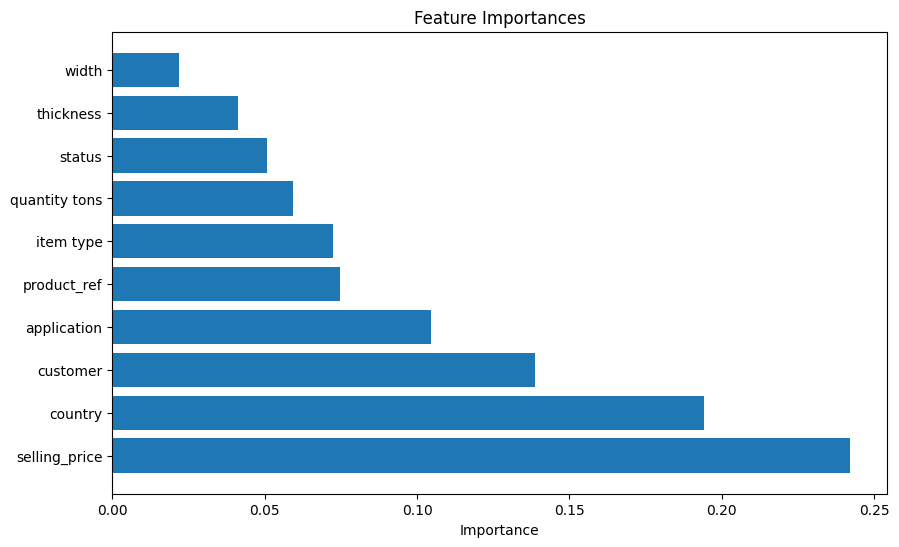

In [50]:

# Get feature importances
feature_importances = model.feature_importances_

# Create a DataFrame with feature names and their corresponding importance
feature_df = pd.DataFrame({
    'Feature': X_train.columns,  # Assuming X_train is a DataFrame
    'Importance': feature_importances
})

# Sort features by importance
feature_df = feature_df.sort_values(by='Importance', ascending=False)

# Print feature importances
print(feature_df)

# Optional: Plot the feature importances
plt.figure(figsize=(10, 6))
plt.barh(feature_df['Feature'], feature_df['Importance'])
plt.xlabel('Importance')
plt.title('Feature Importances')
plt.show()


Build the Regression model for selling price
There is no corr b/w feature and target varible so we can't use lenear regression so will go for decision tree

In [51]:
from sklearn.model_selection import train_test_split

X = df5.drop(columns='selling_price')
y = df5.loc[:, 'selling_price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 145)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((136248, 10), (45417, 10), (136248,), (45417,))

In [52]:
from sklearn.tree import DecisionTreeRegressor

model = DecisionTreeRegressor(random_state=42)

model.fit(X_train, y_train)

model.score(X_test, y_test)


0.8534525510628865

In [ ]:
from sklearn.model_selection import cross_val_score

for depth in range(1,40):
  model = DecisionTreeRegressor(random_state=42,max_depth = depth)
  model.fit(X_train, y_train)
  train_score = model.score(X_train, y_train)
  cross_val = np.mean(cross_val_score(model, X_train, y_train, cv = 10))
  print(f"Depth - {depth}, TrainScore: {train_score}, Cross-ValScore: {cross_val}")

In [53]:
from sklearn.tree import DecisionTreeRegressor

model = DecisionTreeRegressor(random_state=42, max_depth=21)

model.fit(X_train, y_train)

model.score(X_test, y_test)

0.8591801528745123

         Feature  Importance
8    product_ref    0.306346
9      lead_time    0.232866
3         status    0.173458
2        country    0.076032
1       customer    0.066802
6      thickness    0.049149
0  quantity tons    0.034841
5    application    0.023248
4      item type    0.019272
7          width    0.017986


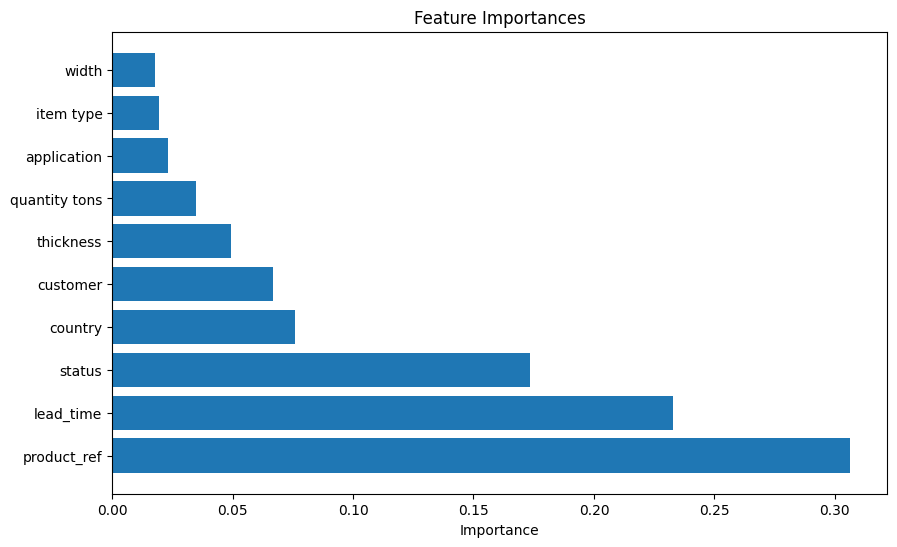

In [57]:

# Get feature importances
feature_importances = model.feature_importances_

# Create a DataFrame with feature names and their corresponding importance
feature_df = pd.DataFrame({
    'Feature': X_train.columns,  # Assuming X_train is a DataFrame
    'Importance': feature_importances
})

# Sort features by importance
feature_df = feature_df.sort_values(by='Importance', ascending=False)

# Print feature importances
print(feature_df)

# Optional: Plot the feature importances
plt.figure(figsize=(10, 6))
plt.barh(feature_df['Feature'], feature_df['Importance'])
plt.xlabel('Importance')
plt.title('Feature Importances')
plt.show()


In [58]:
import pickle

# Save the trained model to a file
with open('trained_Regression_model.pkl', 'wb') as file:
    pickle.dump(model, file)

In [62]:
df5.describe()

,quantity tons,customer,country,status,item type,application,thickness,width,product_ref,selling_price,lead_time
count,181665.000000,1.816650e+05,181665.000000,181665.000000,181665.000000,181665.000000,181665.000000,181665.000000,1.816650e+05,181665.000000,181665.000000
mean,49.174768,3.051222e+07,44.897999,1.316698,4.133053,25.613789,2.245464,1297.046009,4.739686e+08,819.053586,65.136697
std,47.991510,2.433428e+07,24.405804,1.330325,1.055231,17.753693,1.890727,248.965742,7.175107e+08,209.161027,39.782601
min,0.000010,1.245800e+04,25.000000,0.000000,0.000000,2.000000,0.180000,700.000000,6.117280e+05,243.000000,1.000000
25%,10.970711,3.019688e+07,26.000000,1.000000,3.000000,10.000000,0.700000,1180.000000,6.119930e+05,669.000000,30.000000
50%,30.364989,3.020524e+07,30.000000,1.000000,5.000000,15.000000,1.500000,1250.000000,6.406650e+05,812.000000,62.000000
75%,67.159087,3.028042e+07,78.000000,1.000000,5.000000,41.000000,3.000000,1500.000000,1.332077e+09,953.000000,97.876923
max,151.441652,2.147484e+09,113.000000,8.000000,6.000000,99.000000,6.450000,1980.000000,1.722208e+09,1379.000000,448.000000


In [59]:
import pickle

# Save the trained model to a file
with open('df_Regression_model.pkl', 'wb') as file:
    pickle.dump(df5, file)

Classification for status

In [58]:
df_c = df5.copy()

# filter the status column values only 1 & 0 rows in a new dataframe ['Won':1 & 'Lost':0]
df_c = df_c[(df_c.status == 1) | (df_c.status == 0)]

In [59]:
df_c

,quantity tons,customer,country,status,item type,application,thickness,width,product_ref,selling_price,lead_time
1,151.441652,30202938.0,25.0,1,5.0,41.0,0.80,1210.0,1668701718,1047.00,8.944444
2,151.441652,30153963.0,30.0,1,6.0,28.0,0.38,952.0,628377,644.33,41.000000
3,151.441652,30349574.0,32.0,1,3.0,59.0,2.30,1317.0,1668701718,768.00,75.854167
4,151.441652,30211560.0,28.0,1,5.0,10.0,4.00,1980.0,640665,577.00,48.000000
5,151.441652,30202938.0,25.0,1,5.0,41.0,1.50,1265.0,1668701718,983.00,8.944444
...,...,...,...,...,...,...,...,...,...,...,...
181433,32.216122,30227718.0,25.0,0,3.0,15.0,6.00,1980.0,640665,552.00,30.000000
181525,66.431473,30161559.0,30.0,0,3.0,10.0,3.85,1525.0,640665,458.00,30.000000
181527,63.859521,30161559.0,30.0,0,3.0,10.0,5.85,1525.0,640665,457.00,30.000000
181529,56.028562,30161559.0,30.0,0,3.0,10.0,6.45,1500.0,640665,458.00,30.000000


In [60]:
df_c["status"].value_counts()

status
1    116007
0     34436
Name: count, dtype: int64

In [61]:
from sklearn.model_selection import train_test_split

X = df_c.drop(columns='status')
y = df_c.loc[:, 'status']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 145)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((112832, 10), (37611, 10), (112832,), (37611,))

In [62]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import f1_score

model = DecisionTreeClassifier()
model.fit(X_train, y_train)

f1_score(y_test, model.predict(X_test)), model.score(X_test, y_test)

(np.float64(0.9641565953930379), 0.9446438541915929)

In [63]:
from imblearn.combine import SMOTEENN

cc = SMOTEENN(random_state=7)

X_train_smoteenn, y_train_smoteenn = cc.fit_resample(X_train, y_train)

In [64]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import f1_score
from imblearn.combine import SMOTEENN

# Train the DecisionTreeClassifier
model = DecisionTreeClassifier(random_state=42)
model.fit(X_train_smoteenn, y_train_smoteenn)

# Predict and calculate the F1 score
y_pred = model.predict(X_test)
f1 = f1_score(y_test, y_pred)

print(f"F1 Score: {f1}")


F1 Score: 0.9517367716479955


In [65]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score
import numpy as np

# Loop through different depths to evaluate model performance
for depth in range(1, 40):  # Using range(1, 21) for depths 1 to 20
    model = DecisionTreeClassifier(max_depth=depth,random_state=42)  # Corrected class name
    model.fit(X_train, y_train)
    
    # Training score on the training set
    train_score = model.score(X_train, y_train)
    
    # Cross-validation score using 10-fold cross-validation
    cross_val = np.mean(cross_val_score(model, X_train, y_train, cv=10))
    
    # Print the results
    print(f"Depth - {depth}, TrainScore: {train_score:.4f}, Cross-ValScore: {cross_val:.4f}")


Depth - 1, TrainScore: 0.7707, Cross-ValScore: 0.7707
Depth - 2, TrainScore: 0.7707, Cross-ValScore: 0.7707
Depth - 3, TrainScore: 0.7717, Cross-ValScore: 0.7710
Depth - 4, TrainScore: 0.7962, Cross-ValScore: 0.7955


KeyboardInterrupt: 

In [71]:


# Train the DecisionTreeClassifier with the correct parameter
model = DecisionTreeClassifier(random_state=42, max_depth=28)  # Corrected to max_depth
model.fit(X_train_smoteenn, y_train_smoteenn)

# Predict and calculate the F1 score
y_pred = model.predict(X_test)
f1 = f1_score(y_test, y_pred)

# Print the F1 score
print(f"F1 Score: {f1}")




F1 Score: 0.9522719267347658


         Feature  Importance
9      lead_time    0.263967
1       customer    0.207946
3      item type    0.116850
2        country    0.098775
8  selling_price    0.071951
4    application    0.070894
0  quantity tons    0.063549
7    product_ref    0.050597
5      thickness    0.033459
6          width    0.022013


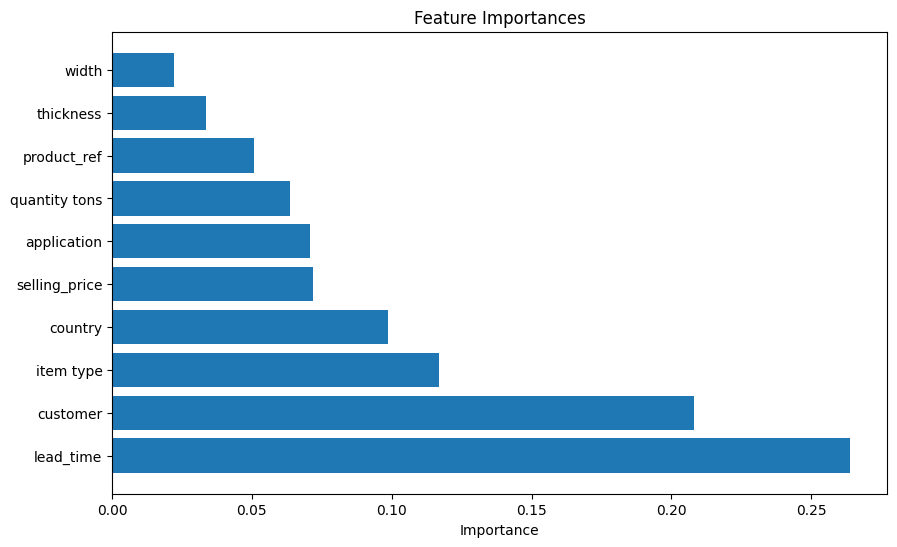

In [73]:

# Get feature importances
feature_importances = model.feature_importances_

# Create a DataFrame with feature names and their corresponding importance
feature_df = pd.DataFrame({
    'Feature': X_train.columns,  # Assuming X_train is a DataFrame
    'Importance': feature_importances
})

# Sort features by importance
feature_df = feature_df.sort_values(by='Importance', ascending=False)

# Print feature importances
print(feature_df)

# Optional: Plot the feature importances
plt.figure(figsize=(10, 6))
plt.barh(feature_df['Feature'], feature_df['Importance'])
plt.xlabel('Importance')
plt.title('Feature Importances')
plt.show()


In [78]:
df5

,quantity tons,customer,country,status,item type,application,thickness,width,product_ref,selling_price,lead_time
1,151.441652,30202938.0,25.0,1,5.0,41.0,0.80,1210.0,1668701718,1047.00,8.944444
2,151.441652,30153963.0,30.0,1,6.0,28.0,0.38,952.0,628377,644.33,41.000000
3,151.441652,30349574.0,32.0,1,3.0,59.0,2.30,1317.0,1668701718,768.00,75.854167
4,151.441652,30211560.0,28.0,1,5.0,10.0,4.00,1980.0,640665,577.00,48.000000
5,151.441652,30202938.0,25.0,1,5.0,41.0,1.50,1265.0,1668701718,983.00,8.944444
...,...,...,...,...,...,...,...,...,...,...,...
181433,32.216122,30227718.0,25.0,0,3.0,15.0,6.00,1980.0,640665,552.00,30.000000
181525,66.431473,30161559.0,30.0,0,3.0,10.0,3.85,1525.0,640665,458.00,30.000000
181527,63.859521,30161559.0,30.0,0,3.0,10.0,5.85,1525.0,640665,457.00,30.000000
181529,56.028562,30161559.0,30.0,0,3.0,10.0,6.45,1500.0,640665,458.00,30.000000


In [74]:
# Assuming you have trained your model and have original data in df_test and predictions

# 1. Predict values
predictions = model.predict(X_test)  # Replace `X_test` with the input DataFrame

# 2. Create a DataFrame with original and predicted values
df_comparison = X_test.copy()  # Copy the input features for context
df_comparison['Original'] = y_test.values  # Add the original target values
df_comparison['Predicted'] = predictions  # Add the predicted values

# Display the DataFrame
df_comparison


,quantity tons,customer,country,item type,application,thickness,width,product_ref,selling_price,lead_time,Original,Predicted
80958,9.273653,30165529.0,78.0,5.0,10.0,6.45,1980.0,640665,690.0,53.0,1,1
151239,53.631088,30393641.0,39.0,5.0,10.0,6.00,1315.0,1670798778,592.0,61.0,1,1
83337,15.933011,30209814.0,25.0,5.0,15.0,6.45,1500.0,1671863738,823.0,114.0,1,1
39405,5.830582,30296119.0,26.0,5.0,29.0,5.40,1140.0,1670798778,905.0,139.0,1,1
161402,63.150700,30161943.0,40.0,3.0,10.0,1.50,1000.0,628377,501.0,58.0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...
57801,3.231594,30165529.0,78.0,5.0,10.0,1.00,1252.0,164141591,905.0,71.0,1,1
10814,26.666819,30329913.0,77.0,3.0,56.0,1.75,1189.0,1670798778,889.0,75.0,1,1
49685,50.145521,30201369.0,25.0,3.0,41.0,5.00,1300.0,1668701718,1047.0,93.0,0,1
10956,89.340026,30156308.0,28.0,5.0,10.0,3.00,1250.0,1670798778,842.0,136.0,1,1


In [81]:
df_comparison.Predicted.value_counts()

Predicted
1    27738
0     9873
Name: count, dtype: int64

In [65]:
df_comparison(df_comparison("Predicted"==0))

NameError: name 'df_comparison' is not defined

In [86]:
df5.describe()

,quantity tons,customer,country,status,item type,application,thickness,width,product_ref,selling_price,lead_time
count,181665.000000,1.816650e+05,181665.000000,181665.000000,181665.000000,181665.000000,181665.000000,181665.000000,1.816650e+05,181665.000000,181665.000000
mean,49.174768,3.051222e+07,44.897999,1.316698,4.133053,25.613789,2.245464,1297.046009,4.739686e+08,819.053586,65.136697
std,47.991510,2.433428e+07,24.405804,1.330325,1.055231,17.753693,1.890727,248.965742,7.175107e+08,209.161027,39.782601
min,0.000010,1.245800e+04,25.000000,0.000000,0.000000,2.000000,0.180000,700.000000,6.117280e+05,243.000000,1.000000
25%,10.970711,3.019688e+07,26.000000,1.000000,3.000000,10.000000,0.700000,1180.000000,6.119930e+05,669.000000,30.000000
50%,30.364989,3.020524e+07,30.000000,1.000000,5.000000,15.000000,1.500000,1250.000000,6.406650e+05,812.000000,62.000000
75%,67.159087,3.028042e+07,78.000000,1.000000,5.000000,41.000000,3.000000,1500.000000,1.332077e+09,953.000000,97.876923
max,151.441652,2.147484e+09,113.000000,8.000000,6.000000,99.000000,6.450000,1980.000000,1.722208e+09,1379.000000,448.000000


In [88]:
df5.product_ref.value_counts()

product_ref
611993        45724
164141591     28783
640665        27375
1670798778    18915
628377        18573
1668701718    15283
640405         9715
1671863738     5162
1332077137     4561
1693867550     1825
1668701376     1216
1671876026      823
628117          775
164337175       653
1668701698      374
1693867563      293
1282007633      281
1721130331      257
1665572374      202
628112          177
611728          148
1690738206      147
1722207579      125
640400           83
1668701725       56
164336407        49
611733           45
1690738219       19
1665584320       12
1665572032       10
1665584642        2
929423819         1
1665584662        1
Name: count, dtype: int64

In [76]:
import pickle

# Save the trained model to a file
with open('trained_classification_model.pkl', 'wb') as file:
    pickle.dump(model, file)

In [ ]:
import pickle

# Save the trained model to a file
with open('trained_classification_df_model.pkl', 'wb') as file:
    pickle.dump(df5, file)

In [1]:
df5

NameError: name 'df5' is not defined